In [1]:
import pandas as pd

In [2]:
df_sales = pd.read_csv('ventas-por-factura.csv')
df_sales.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [19]:
df_sales

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416,United Kingdom,357,"344,83"
...,...,...,...,...,...,...
25948,C556518,6/13/2021 10:53:00,16794,United Kingdom,-2,"-12,70"
25949,553060,5/13/2021 10:44:00,15826,United Kingdom,488,"720,00"
25950,577049,11/17/2021 13:58:00,17397,United Kingdom,104,"298,78"
25951,550122,4/14/2021 12:39:00,12931,United Kingdom,1176,"1488,00"


In [18]:
df_sales.dtypes

N° de factura       object
Fecha de factura    object
ID Cliente           int32
País                object
Cantidad             int64
Monto               object
dtype: object

In [13]:
df_sales.isnull().sum()

N° de factura          0
Fecha de factura       0
ID Cliente          3724
País                   0
Cantidad               0
Monto                  0
dtype: int64

In [14]:
#we want identify null data
df_sales[pd.isna(df_sales['ID Cliente'])]

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
11,539736,12/21/2020 15:18:00,NaN,United Kingdom,143,"1172,46"
12,537823,12/8/2020 14:25:00,NaN,United Kingdom,1484,"6073,71"
16,542418,1/27/2021 17:39:00,NaN,United Kingdom,-17,"0,00"
21,550759,4/20/2021 12:09:00,NaN,United Kingdom,-7,"0,00"
23,556427,6/10/2021 13:23:00,NaN,United Kingdom,92,"435,69"
...,...,...,...,...,...,...
25930,539300,12/16/2020 17:31:00,NaN,United Kingdom,38,"72,59"
25932,565303,9/2/2021 12:17:00,NaN,Unspecified,258,"286,85"
25937,543533,2/9/2021 13:00:00,NaN,United Kingdom,155,"1001,27"
25939,C572450,10/24/2021 12:35:00,NaN,United Kingdom,-2,"-278,15"


In [15]:
# we transform null data in column "ID Cliente" to 0
df_sales['ID Cliente'].fillna(0, inplace=True)


In [28]:
df_sales[df_sales['ID Cliente'] == 0]

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
11,539736,12/21/2020 15:18:00,0,United Kingdom,143,1172.46
12,537823,12/8/2020 14:25:00,0,United Kingdom,1484,6073.71
16,542418,1/27/2021 17:39:00,0,United Kingdom,-17,0.00
21,550759,4/20/2021 12:09:00,0,United Kingdom,-7,0.00
23,556427,6/10/2021 13:23:00,0,United Kingdom,92,435.69
...,...,...,...,...,...,...
25930,539300,12/16/2020 17:31:00,0,United Kingdom,38,72.59
25932,565303,9/2/2021 12:17:00,0,Unspecified,258,286.85
25937,543533,2/9/2021 13:00:00,0,United Kingdom,155,1001.27
25939,C572450,10/24/2021 12:35:00,0,United Kingdom,-2,-278.15


In [17]:
# in our dataframe, we have in column "ID Cliente" in float, so we have to transform in integer
df_sales['ID Cliente'] = df_sales['ID Cliente'].astype(int)

In [26]:
df_sales['Monto'] = df_sales['Monto'].str.replace(',','.')

In [29]:
df_sales['Monto'] = df_sales['Monto'].astype(float)

In [31]:
#result after the data transformation process
df_sales.dtypes

N° de factura        object
Fecha de factura     object
ID Cliente            int32
País                 object
Cantidad              int64
Monto               float64
dtype: object

In [35]:
df_sales['Monto'].max()

168469.6

In [36]:
df_sales['Cantidad'].max()

80995

In [37]:
#Let's identify the largest values in "Cantidad"
clients_largest = df_sales['Monto'].nlargest(10).index
df_sales.loc[clients_largest]

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
13136,581483,12/9/2021 9:15:00,16446,United Kingdom,80995,168469.60
14675,541431,1/18/2021 10:01:00,12346,United Kingdom,74215,77183.60
6347,574941,11/7/2021 17:42:00,0,United Kingdom,14149,52940.94
10802,576365,11/14/2021 17:55:00,0,United Kingdom,13956,50653.91
23336,556444,6/10/2021 15:28:00,15098,United Kingdom,60,38970.00
21317,567423,9/20/2021 11:05:00,17450,United Kingdom,12572,31698.16
24527,556917,6/15/2021 13:37:00,12415,Australia,15049,22775.93
25877,572209,10/21/2021 12:08:00,18102,United Kingdom,1920,22206.00
667,567381,9/20/2021 10:12:00,17450,United Kingdom,6760,22104.80
16188,563614,8/18/2021 8:51:00,12415,Australia,12196,21880.44


In [44]:
data_clientes = df_sales.groupby('País')['País'].count().sort_values(ascending=False)

df_countries = pd.DataFrame({'Pais': data_clientes.index, "Cantidad Clientes": data_clientes.values})


In [45]:
df_countries

,Pais,Cantidad Clientes
0,United Kingdom,23542
1,Germany,603
2,France,462
3,EIRE,362
4,Belgium,119
5,Spain,105
6,Netherlands,101
7,Switzerland,74
8,Portugal,71
9,Australia,69


In [75]:
#let's identify the clients who are from the United Kingdom
df_UK = df_sales[df_sales['País'] == 'United Kingdom']
df_UK

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348,United Kingdom,163,209.73
3,549106,4/6/2021 12:08:00,17045,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416,United Kingdom,357,344.83
6,538125,12/9/2020 15:46:00,18225,United Kingdom,16,30.00
...,...,...,...,...,...,...
25948,C556518,6/13/2021 10:53:00,16794,United Kingdom,-2,-12.70
25949,553060,5/13/2021 10:44:00,15826,United Kingdom,488,720.00
25950,577049,11/17/2021 13:58:00,17397,United Kingdom,104,298.78
25951,550122,4/14/2021 12:39:00,12931,United Kingdom,1176,1488.00


In [76]:
#clientes que mas han gastado en el Reino Unido 
clientes_monto = df_UK['Monto'].nlargest(2354)
df_UK.loc[clientes_monto.index]

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
13136,581483,12/9/2021 9:15:00,16446,United Kingdom,80995,168469.60
14675,541431,1/18/2021 10:01:00,12346,United Kingdom,74215,77183.60
6347,574941,11/7/2021 17:42:00,0,United Kingdom,14149,52940.94
10802,576365,11/14/2021 17:55:00,0,United Kingdom,13956,50653.91
23336,556444,6/10/2021 15:28:00,15098,United Kingdom,60,38970.00
...,...,...,...,...,...,...
636,569319,10/3/2021 12:17:00,14290,United Kingdom,448,728.50
2871,541783,1/21/2021 11:55:00,16618,United Kingdom,396,728.16
23942,560368,7/18/2021 12:25:00,17841,United Kingdom,384,728.06
24825,539635,12/20/2020 15:14:00,14051,United Kingdom,192,728.04


In [78]:
#vamos a aplicar el modelo de regresion linal simple en nuestra data, pero tenemos un inconveniente y es de que tenemos datos negativos donde no deberia
#entonces eliminaremos los valores negativos antes de seguir 
df_UK = df_UK[(df_UK['Cantidad'] > 0) & (df_UK['Monto'] > 0)]
df_UK.sort_values("Monto", ascending=False)

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
13136,581483,12/9/2021 9:15:00,16446,United Kingdom,80995,168469.60
14675,541431,1/18/2021 10:01:00,12346,United Kingdom,74215,77183.60
6347,574941,11/7/2021 17:42:00,0,United Kingdom,14149,52940.94
10802,576365,11/14/2021 17:55:00,0,United Kingdom,13956,50653.91
23336,556444,6/10/2021 15:28:00,15098,United Kingdom,60,38970.00
...,...,...,...,...,...,...
4672,542736,1/31/2021 15:37:00,14744,United Kingdom,1,0.55
21831,573589,10/31/2021 15:11:00,0,United Kingdom,1,0.55
10678,539441,12/17/2020 15:30:00,0,United Kingdom,1,0.42
10247,567869,9/22/2021 14:18:00,16669,United Kingdom,5,0.40


In [90]:
#aplicaremos regresion lineal para los clientes del reino unido

#dividimos los datos en variables independientes (X) y variables depedientes (y)
X = df_UK[["Cantidad"]]
y = df_UK['Monto']

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#division el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [92]:
#creando instancia para el modelo
regression = LinearRegression()
#creando modelo
regression.fit(X_train, y_train)

LinearRegression()

In [93]:
#haciendo prediccions con el conjunto de prueba
y_pred = regression.predict(X_test)

In [94]:
y_pred

array([267.01165786, 327.30515517, 240.21454794, ..., 608.67480932,
       146.42466323, 412.72094304])

In [95]:
y_test

21098    252.62
5204     305.02
8194     229.26
18123    710.20
22190    223.36
          ...  
7288     348.57
16731    251.02
12364    462.28
716      111.29
10074    341.36
Name: Monto, Length: 3612, dtype: float64

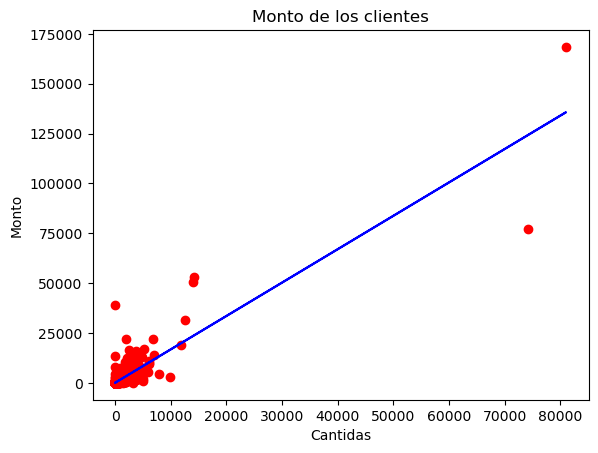

In [96]:
#visualizacion de los resultados de los datos de entrenamiento
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regression.predict(X_train), color='blue')
plt.title("Monto de los clientes")
plt.xlabel("Cantidas")
plt.ylabel("Monto")
plt.show()

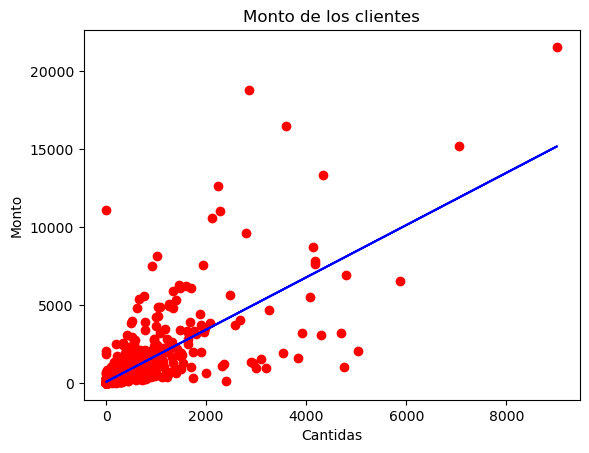

In [97]:
#visualizacion de los resultados de test
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color='blue')
plt.title("Monto de los clientes")
plt.xlabel("Cantidas")
plt.ylabel("Monto")
plt.show()